In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
from tifffile import imread, imsave
from csbdeep.utils import Path, normalize
from csbdeep.utils.tf import keras_import
keras = keras_import()

In [3]:
from glob import glob
import json
from tqdm import tqdm
from tifffile import imread
from csbdeep.utils import Path, normalize

In [4]:
from stardist import fill_label_holes, random_label_cmap, calculate_extents, gputools_available
from stardist.matching import matching, matching_dataset
from stardist.models import Config2D, StarDist2D, StarDistData2D
from stardist.utils import mask_to_categorical
from stardist.plot import render_label
from stardist import export_imagej_rois, random_label_cmap

In [5]:
np.random.seed(0)
cmap = random_label_cmap()

In [6]:
def show_image(img, **kwargs):
    """Plot large image at different resolutions."""
    fig, ax = plt.subplots(2,4, figsize=(16,8))
    mid = [s//2 + 600 for s in img.shape[:2]]
    for a,t,u in zip(ax.ravel(),[1,2,4,8,16,32,64,128],[16,8,4,2,1,1,1,1]):
        sl = tuple(slice(c - s//t//2, c + s//t//2, u) for s,c in zip(img.shape[:2],mid))
        a.imshow(img[sl], **kwargs)
        a.axis('off')
    plt.tight_layout()
    plt.show()

In [7]:
img = imread('sample_bc_wsi.svs')
print(img.shape)

(31628, 51930, 3)


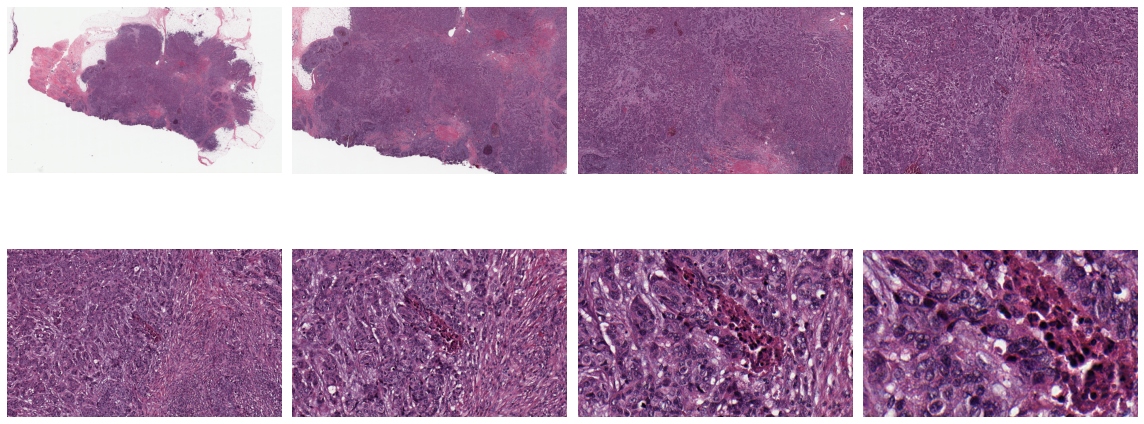

In [8]:
show_image(img)

In [9]:
model = StarDist2D(None, name='stardist_conic_64', basedir='models')

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.453298, nms_thresh=0.3.


In [10]:
from csbdeep.data import Normalizer, normalize_mi_ma

class MyNormalizer(Normalizer):
    def __init__(self, mi, ma):
            self.mi, self.ma = mi, ma
    def before(self, x, axes):
        return normalize_mi_ma(x, self.mi, self.ma, dtype=np.float32)
    def after(*args, **kwargs):
        assert False
    @property
    def do_after(self):
        return False

In [11]:
mi, ma = 0, 255                                                   # use min and max dtype values (suitable here)
normalizer = MyNormalizer(mi, ma)

labels, res = model.predict_instances_big(img, axes='YXC', block_size=4096,
                                            min_overlap=256)

1/1 [==============================] - 0s 58ms/step
effective: block_size=(4096, 4096, 3), min_overlap=(256, 256, 0), context=(96, 96, 0)


  0%|                                                                                          | 0/135 [00:00<?, ?it/s]base.py (395): Predicting on non-float input... ( forgot to normalize? )


1/1 [==============================] - 20s 20s/step


  1%|▌                                                                                 | 1/135 [00:22<51:14, 22.94s/it]

1/1 [==============================] - 10s 10s/step


  1%|█▏                                                                                | 2/135 [00:36<38:01, 17.15s/it]

1/1 [==============================] - 10s 10s/step


  2%|█▊                                                                                | 3/135 [00:49<33:41, 15.31s/it]

1/1 [==============================] - 11s 11s/step


  3%|██▍                                                                               | 4/135 [01:02<31:32, 14.45s/it]

1/1 [==============================] - 11s 11s/step


  4%|███                                                                               | 5/135 [01:15<30:14, 13.96s/it]

1/1 [==============================] - 10s 10s/step


  4%|███▋                                                                              | 6/135 [01:28<29:14, 13.60s/it]

1/1 [==============================] - 11s 11s/step


  5%|████▎                                                                             | 7/135 [01:41<28:53, 13.55s/it]

1/1 [==============================] - 11s 11s/step


  6%|████▊                                                                             | 8/135 [01:56<29:18, 13.85s/it]

1/1 [==============================] - 12s 12s/step


  7%|█████▍                                                                            | 9/135 [02:11<29:45, 14.17s/it]

1/1 [==============================] - 11s 11s/step


  7%|██████                                                                           | 10/135 [02:24<29:20, 14.09s/it]

1/1 [==============================] - 10s 10s/step


  8%|██████▌                                                                          | 11/135 [02:38<28:42, 13.89s/it]

1/1 [==============================] - 11s 11s/step


  9%|███████▏                                                                         | 12/135 [02:51<28:04, 13.70s/it]

1/1 [==============================] - 10s 10s/step


 10%|███████▊                                                                         | 13/135 [03:04<27:00, 13.29s/it]

1/1 [==============================] - 10s 10s/step


 10%|████████▍                                                                        | 14/135 [03:16<26:05, 12.94s/it]

1/1 [==============================] - 11s 11s/step


 11%|█████████                                                                        | 15/135 [03:29<25:59, 12.99s/it]

1/1 [==============================] - 10s 10s/step


 12%|█████████▌                                                                       | 16/135 [03:42<25:38, 12.93s/it]

1/1 [==============================] - 10s 10s/step


 13%|██████████▏                                                                      | 17/135 [03:55<25:33, 13.00s/it]

1/1 [==============================] - 12s 12s/step


 13%|██████████▊                                                                      | 18/135 [04:09<26:06, 13.39s/it]

1/1 [==============================] - 11s 11s/step


 14%|███████████▍                                                                     | 19/135 [04:23<26:22, 13.64s/it]

1/1 [==============================] - 11s 11s/step


 15%|████████████                                                                     | 20/135 [04:37<26:26, 13.79s/it]

1/1 [==============================] - 10s 10s/step


 16%|████████████▌                                                                    | 21/135 [04:51<26:00, 13.69s/it]

1/1 [==============================] - 11s 11s/step


 16%|█████████████▏                                                                   | 22/135 [05:07<27:25, 14.57s/it]

1/1 [==============================] - 9s 9s/step


 17%|█████████████▊                                                                   | 23/135 [05:22<27:16, 14.61s/it]

1/1 [==============================] - 9s 9s/step


 18%|██████████████▍                                                                  | 24/135 [05:36<26:49, 14.50s/it]

1/1 [==============================] - 9s 9s/step


 19%|███████████████                                                                  | 25/135 [05:51<26:22, 14.39s/it]

1/1 [==============================] - 10s 10s/step


 19%|███████████████▌                                                                 | 26/135 [06:05<26:19, 14.49s/it]

1/1 [==============================] - 9s 9s/step


 20%|████████████████▏                                                                | 27/135 [06:18<25:06, 13.95s/it]

1/1 [==============================] - 10s 10s/step


 21%|████████████████▊                                                                | 28/135 [06:30<23:53, 13.39s/it]

1/1 [==============================] - 10s 10s/step


 21%|█████████████████▍                                                               | 29/135 [06:42<23:01, 13.03s/it]

1/1 [==============================] - 10s 10s/step


 22%|██████████████████                                                               | 30/135 [06:54<22:09, 12.66s/it]

1/1 [==============================] - 10s 10s/step


 23%|██████████████████▌                                                              | 31/135 [07:07<22:05, 12.74s/it]

1/1 [==============================] - 10s 10s/step


 24%|███████████████████▏                                                             | 32/135 [07:19<21:44, 12.67s/it]

1/1 [==============================] - 10s 10s/step


 24%|███████████████████▊                                                             | 33/135 [07:32<21:36, 12.71s/it]

1/1 [==============================] - 9s 9s/step


 25%|████████████████████▍                                                            | 34/135 [07:45<21:24, 12.72s/it]

1/1 [==============================] - 10s 10s/step


 26%|█████████████████████                                                            | 35/135 [07:58<21:30, 12.90s/it]

1/1 [==============================] - 11s 11s/step


 27%|█████████████████████▌                                                           | 36/135 [08:16<23:33, 14.28s/it]

1/1 [==============================] - 12s 12s/step


 27%|██████████████████████▏                                                          | 37/135 [08:34<25:15, 15.46s/it]

1/1 [==============================] - 11s 11s/step


 28%|██████████████████████▊                                                          | 38/135 [08:50<25:12, 15.59s/it]

1/1 [==============================] - 11s 11s/step


 29%|███████████████████████▍                                                         | 39/135 [09:09<26:34, 16.61s/it]

1/1 [==============================] - 11s 11s/step


 30%|████████████████████████                                                         | 40/135 [09:27<26:50, 16.96s/it]

1/1 [==============================] - 12s 12s/step


 30%|████████████████████████▌                                                        | 41/135 [09:45<27:06, 17.31s/it]

1/1 [==============================] - 10s 10s/step


 31%|█████████████████████████▏                                                       | 42/135 [10:02<26:35, 17.16s/it]

1/1 [==============================] - 11s 11s/step


 32%|█████████████████████████▊                                                       | 43/135 [10:18<25:54, 16.89s/it]

1/1 [==============================] - 11s 11s/step


 33%|██████████████████████████▍                                                      | 44/135 [10:32<24:16, 16.01s/it]

1/1 [==============================] - 12s 12s/step


 33%|███████████████████████████                                                      | 45/135 [10:46<23:18, 15.54s/it]

1/1 [==============================] - 11s 11s/step


 34%|███████████████████████████▌                                                     | 46/135 [11:01<22:50, 15.39s/it]

1/1 [==============================] - 11s 11s/step


 35%|████████████████████████████▏                                                    | 47/135 [11:16<22:02, 15.03s/it]

1/1 [==============================] - 10s 10s/step


 36%|████████████████████████████▊                                                    | 48/135 [11:29<21:13, 14.64s/it]

1/1 [==============================] - 11s 11s/step


 36%|█████████████████████████████▍                                                   | 49/135 [11:45<21:19, 14.88s/it]

1/1 [==============================] - 12s 12s/step


 37%|██████████████████████████████                                                   | 50/135 [12:02<22:18, 15.74s/it]

1/1 [==============================] - 12s 12s/step


 38%|██████████████████████████████▌                                                  | 51/135 [12:21<23:23, 16.71s/it]

1/1 [==============================] - 11s 11s/step


 39%|███████████████████████████████▏                                                 | 52/135 [12:39<23:21, 16.89s/it]

1/1 [==============================] - 11s 11s/step


 39%|███████████████████████████████▊                                                 | 53/135 [12:56<23:08, 16.93s/it]

1/1 [==============================] - 10s 10s/step


 40%|████████████████████████████████▍                                                | 54/135 [13:12<22:45, 16.86s/it]

1/1 [==============================] - 11s 11s/step


 41%|█████████████████████████████████                                                | 55/135 [13:30<22:46, 17.08s/it]

1/1 [==============================] - 11s 11s/step


 41%|█████████████████████████████████▌                                               | 56/135 [13:47<22:20, 16.97s/it]

1/1 [==============================] - 11s 11s/step


 42%|██████████████████████████████████▏                                              | 57/135 [14:03<21:57, 16.89s/it]

1/1 [==============================] - 10s 10s/step


 43%|██████████████████████████████████▊                                              | 58/135 [14:21<21:44, 16.95s/it]

1/1 [==============================] - 10s 10s/step


 44%|███████████████████████████████████▍                                             | 59/135 [14:35<20:30, 16.19s/it]

1/1 [==============================] - 10s 10s/step


 44%|████████████████████████████████████                                             | 60/135 [14:48<18:52, 15.10s/it]

1/1 [==============================] - 10s 10s/step


 45%|████████████████████████████████████▌                                            | 61/135 [15:01<18:10, 14.74s/it]

1/1 [==============================] - 11s 11s/step


 46%|█████████████████████████████████████▏                                           | 62/135 [15:15<17:36, 14.47s/it]

1/1 [==============================] - 10s 10s/step


 47%|█████████████████████████████████████▊                                           | 63/135 [15:29<17:03, 14.22s/it]

1/1 [==============================] - 12s 12s/step


 47%|██████████████████████████████████████▍                                          | 64/135 [15:48<18:32, 15.67s/it]

1/1 [==============================] - 14s 14s/step


 48%|███████████████████████████████████████                                          | 65/135 [16:14<21:54, 18.77s/it]

1/1 [==============================] - 14s 14s/step


 49%|███████████████████████████████████████▌                                         | 66/135 [16:37<22:54, 19.91s/it]

1/1 [==============================] - 12s 12s/step


 50%|████████████████████████████████████████▏                                        | 67/135 [16:57<22:36, 19.94s/it]

1/1 [==============================] - 12s 12s/step


 50%|████████████████████████████████████████▊                                        | 68/135 [17:15<21:50, 19.56s/it]

1/1 [==============================] - 11s 11s/step


 51%|█████████████████████████████████████████▍                                       | 69/135 [17:33<20:59, 19.08s/it]

1/1 [==============================] - 11s 11s/step


 52%|██████████████████████████████████████████                                       | 70/135 [17:50<20:01, 18.48s/it]

1/1 [==============================] - 11s 11s/step


 53%|██████████████████████████████████████████▌                                      | 71/135 [18:07<19:06, 17.91s/it]

1/1 [==============================] - 10s 10s/step


 53%|███████████████████████████████████████████▏                                     | 72/135 [18:24<18:28, 17.60s/it]

1/1 [==============================] - 10s 10s/step


 54%|███████████████████████████████████████████▊                                     | 73/135 [18:41<17:56, 17.36s/it]

1/1 [==============================] - 10s 10s/step


 55%|████████████████████████████████████████████▍                                    | 74/135 [18:54<16:35, 16.31s/it]

1/1 [==============================] - 10s 10s/step


 56%|█████████████████████████████████████████████                                    | 75/135 [19:07<15:06, 15.10s/it]

1/1 [==============================] - 10s 10s/step


 56%|█████████████████████████████████████████████▌                                   | 76/135 [19:20<14:25, 14.67s/it]

1/1 [==============================] - 10s 10s/step


 57%|██████████████████████████████████████████████▏                                  | 77/135 [19:34<13:45, 14.23s/it]

1/1 [==============================] - 10s 10s/step


 58%|██████████████████████████████████████████████▊                                  | 78/135 [19:46<13:03, 13.74s/it]

1/1 [==============================] - 10s 10s/step


 59%|███████████████████████████████████████████████▍                                 | 79/135 [20:01<13:02, 13.97s/it]

1/1 [==============================] - 10s 10s/step


 59%|████████████████████████████████████████████████                                 | 80/135 [20:17<13:26, 14.67s/it]

1/1 [==============================] - 11s 11s/step


 60%|████████████████████████████████████████████████▌                                | 81/135 [20:36<14:16, 15.86s/it]

1/1 [==============================] - 11s 11s/step


 61%|█████████████████████████████████████████████████▏                               | 82/135 [20:53<14:28, 16.38s/it]

1/1 [==============================] - 10s 10s/step


 61%|█████████████████████████████████████████████████▊                               | 83/135 [21:10<14:12, 16.39s/it]

1/1 [==============================] - 10s 10s/step


 62%|██████████████████████████████████████████████████▍                              | 84/135 [21:27<14:03, 16.55s/it]

1/1 [==============================] - 10s 10s/step


 63%|███████████████████████████████████████████████████                              | 85/135 [21:43<13:51, 16.62s/it]

1/1 [==============================] - 10s 10s/step


 64%|███████████████████████████████████████████████████▌                             | 86/135 [22:00<13:29, 16.51s/it]

1/1 [==============================] - 10s 10s/step


 64%|████████████████████████████████████████████████████▏                            | 87/135 [22:17<13:28, 16.84s/it]

1/1 [==============================] - 10s 10s/step


 65%|████████████████████████████████████████████████████▊                            | 88/135 [22:35<13:20, 17.04s/it]

1/1 [==============================] - 10s 10s/step


 66%|█████████████████████████████████████████████████████▍                           | 89/135 [22:49<12:32, 16.35s/it]

1/1 [==============================] - 10s 10s/step


 67%|██████████████████████████████████████████████████████                           | 90/135 [23:02<11:19, 15.09s/it]

1/1 [==============================] - 10s 10s/step


 67%|██████████████████████████████████████████████████████▌                          | 91/135 [23:16<10:52, 14.84s/it]

1/1 [==============================] - 11s 11s/step


 68%|███████████████████████████████████████████████████████▏                         | 92/135 [23:29<10:22, 14.47s/it]

1/1 [==============================] - 11s 11s/step


 69%|███████████████████████████████████████████████████████▊                         | 93/135 [23:43<10:02, 14.34s/it]

1/1 [==============================] - 11s 11s/step


 70%|████████████████████████████████████████████████████████▍                        | 94/135 [23:57<09:42, 14.20s/it]

1/1 [==============================] - 11s 11s/step


 70%|█████████████████████████████████████████████████████████                        | 95/135 [24:10<09:14, 13.86s/it]

1/1 [==============================] - 10s 10s/step


 71%|█████████████████████████████████████████████████████████▌                       | 96/135 [24:25<09:03, 13.95s/it]

1/1 [==============================] - 11s 11s/step


 72%|██████████████████████████████████████████████████████████▏                      | 97/135 [24:39<09:00, 14.23s/it]

1/1 [==============================] - 11s 11s/step


 73%|██████████████████████████████████████████████████████████▊                      | 98/135 [24:55<09:02, 14.66s/it]

1/1 [==============================] - 10s 10s/step


 73%|███████████████████████████████████████████████████████████▍                     | 99/135 [25:10<08:49, 14.72s/it]

1/1 [==============================] - 11s 11s/step


 74%|███████████████████████████████████████████████████████████▎                    | 100/135 [25:27<09:00, 15.45s/it]

1/1 [==============================] - 12s 12s/step


 75%|███████████████████████████████████████████████████████████▊                    | 101/135 [25:46<09:15, 16.34s/it]

1/1 [==============================] - 11s 11s/step


 76%|████████████████████████████████████████████████████████████▍                   | 102/135 [26:03<09:09, 16.66s/it]

1/1 [==============================] - 11s 11s/step


 76%|█████████████████████████████████████████████████████████████                   | 103/135 [26:19<08:51, 16.61s/it]

1/1 [==============================] - 11s 11s/step


 77%|█████████████████████████████████████████████████████████████▋                  | 104/135 [26:33<08:10, 15.82s/it]

1/1 [==============================] - 10s 10s/step


 78%|██████████████████████████████████████████████████████████████▏                 | 105/135 [26:46<07:26, 14.90s/it]

1/1 [==============================] - 12s 12s/step


 79%|██████████████████████████████████████████████████████████████▊                 | 106/135 [27:01<07:13, 14.94s/it]

1/1 [==============================] - 10s 10s/step


 79%|███████████████████████████████████████████████████████████████▍                | 107/135 [27:14<06:37, 14.20s/it]

1/1 [==============================] - 10s 10s/step


 80%|████████████████████████████████████████████████████████████████                | 108/135 [27:26<06:08, 13.67s/it]

1/1 [==============================] - 10s 10s/step


 81%|████████████████████████████████████████████████████████████████▌               | 109/135 [27:39<05:48, 13.42s/it]

1/1 [==============================] - 10s 10s/step


 81%|█████████████████████████████████████████████████████████████████▏              | 110/135 [27:51<05:27, 13.12s/it]

1/1 [==============================] - 10s 10s/step


 82%|█████████████████████████████████████████████████████████████████▊              | 111/135 [28:04<05:11, 12.97s/it]

1/1 [==============================] - 10s 10s/step


 83%|██████████████████████████████████████████████████████████████████▎             | 112/135 [28:16<04:54, 12.82s/it]

1/1 [==============================] - 11s 11s/step


 84%|██████████████████████████████████████████████████████████████████▉             | 113/135 [28:29<04:43, 12.88s/it]

1/1 [==============================] - 10s 10s/step


 84%|███████████████████████████████████████████████████████████████████▌            | 114/135 [28:42<04:28, 12.79s/it]

1/1 [==============================] - 10s 10s/step


 85%|████████████████████████████████████████████████████████████████████▏           | 115/135 [28:55<04:17, 12.86s/it]

1/1 [==============================] - 10s 10s/step


 86%|████████████████████████████████████████████████████████████████████▋           | 116/135 [29:10<04:14, 13.41s/it]

1/1 [==============================] - 10s 10s/step


 87%|█████████████████████████████████████████████████████████████████████▎          | 117/135 [29:24<04:08, 13.81s/it]

1/1 [==============================] - 10s 10s/step


 87%|█████████████████████████████████████████████████████████████████████▉          | 118/135 [29:37<03:48, 13.45s/it]

1/1 [==============================] - 10s 10s/step


 88%|██████████████████████████████████████████████████████████████████████▌         | 119/135 [29:49<03:29, 13.10s/it]

1/1 [==============================] - 10s 10s/step


 89%|███████████████████████████████████████████████████████████████████████         | 120/135 [30:02<03:13, 12.88s/it]

1/1 [==============================] - 10s 10s/step


 90%|███████████████████████████████████████████████████████████████████████▋        | 121/135 [30:15<03:01, 12.97s/it]

1/1 [==============================] - 10s 10s/step


 90%|████████████████████████████████████████████████████████████████████████▎       | 122/135 [30:27<02:46, 12.79s/it]

1/1 [==============================] - 10s 10s/step


 91%|████████████████████████████████████████████████████████████████████████▉       | 123/135 [30:40<02:31, 12.63s/it]

1/1 [==============================] - 10s 10s/step


 92%|█████████████████████████████████████████████████████████████████████████▍      | 124/135 [30:53<02:20, 12.75s/it]

1/1 [==============================] - 10s 10s/step


 93%|██████████████████████████████████████████████████████████████████████████      | 125/135 [31:05<02:07, 12.70s/it]

1/1 [==============================] - 11s 11s/step


 93%|██████████████████████████████████████████████████████████████████████████▋     | 126/135 [31:18<01:55, 12.86s/it]

1/1 [==============================] - 10s 10s/step


 94%|███████████████████████████████████████████████████████████████████████████▎    | 127/135 [31:32<01:43, 12.95s/it]

1/1 [==============================] - 10s 10s/step


 95%|███████████████████████████████████████████████████████████████████████████▊    | 128/135 [31:44<01:29, 12.72s/it]

1/1 [==============================] - 10s 10s/step


 96%|████████████████████████████████████████████████████████████████████████████▍   | 129/135 [31:57<01:16, 12.75s/it]

1/1 [==============================] - 10s 10s/step


 96%|█████████████████████████████████████████████████████████████████████████████   | 130/135 [32:09<01:03, 12.68s/it]

1/1 [==============================] - 10s 10s/step


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 131/135 [32:22<00:50, 12.67s/it]

1/1 [==============================] - 10s 10s/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 132/135 [32:35<00:38, 12.70s/it]

1/1 [==============================] - 10s 10s/step


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 133/135 [32:47<00:25, 12.59s/it]

1/1 [==============================] - 10s 10s/step


 99%|███████████████████████████████████████████████████████████████████████████████▍| 134/135 [32:59<00:12, 12.58s/it]

1/1 [==============================] - 10s 10s/step


100%|████████████████████████████████████████████████████████████████████████████████| 135/135 [33:12<00:00, 14.76s/it]


In [12]:
def class_from_res(res):
    cls_dict = dict((i+1,c) for i,c in enumerate(res['class_id']))
    return cls_dict

print(class_from_res(res))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
values, counts = np.unique(res['class_id'], return_counts=True)
print(counts)


[101847  19666 203571 126659  64518  26006 118247]


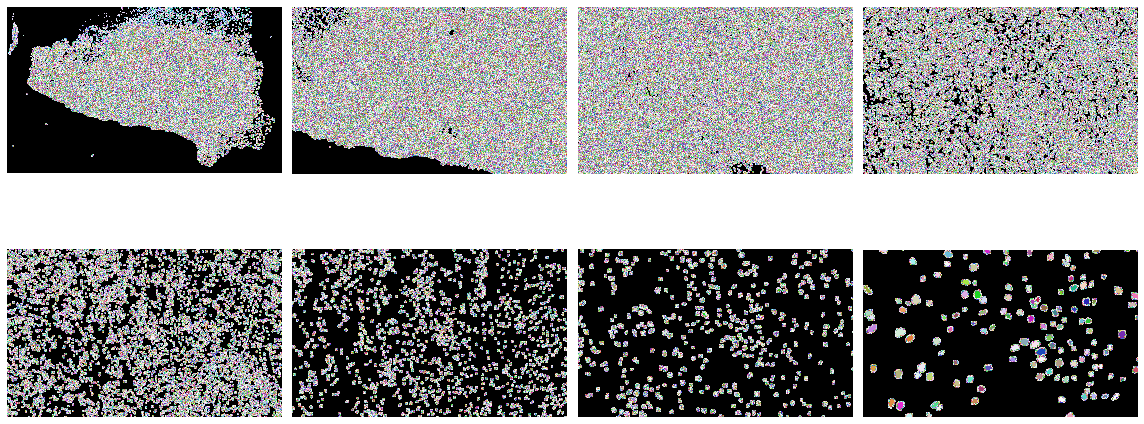

In [14]:
show_image(labels, cmap=cmap)

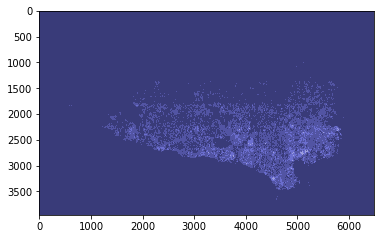

In [15]:
plt.imshow(labels[::8, ::8], cmap='heat')

In [16]:
from skimage.measure import regionprops_table
import pandas as pd

In [17]:
# Slow - takes time as we have many many objects
props = regionprops_table(labels, img, 
                          properties=['label',
                                      'area', 'equivalent_diameter',
                                      'mean_intensity', 'solidity'])

In [18]:
analysis_results = pd.DataFrame(props)
print(analysis_results.tail())

         label  area  equivalent_diameter  mean_intensity-0  mean_intensity-1  \
660509  660510    40             7.136496         87.575000         51.650000   
660510  660511    40             7.136496         95.075000         53.300000   
660511  660512    44             7.484821         92.727273         59.386364   
660512  660513    86            10.464158        109.151163         67.558140   
660513  660514    55             8.368284         82.909091         47.745455   

        mean_intensity-2  solidity  
660509         95.950000  0.888889  
660510        100.700000  0.869565  
660511        113.340909  0.897959  
660512        120.476744  0.924731  
660513         95.636364  0.846154  


<AxesSubplot:xlabel='area', ylabel='Count'>

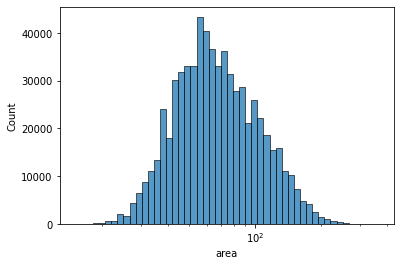

In [20]:
import seaborn as sns


sns.histplot(x="area", data=analysis_results, bins=50, log_scale=True)